# Common Conversion Point Stack of a Single Station

The following notebook carries you through how to get from 
a set of receiver functions of a single station to a 3D 
common conversion point (CCP) stack using the data from the
`YP` network, which you should have downloaded in a previous step. 

---
***Note***:

It is assumed here that you have successfully computed the
receiver functions from the `00b_DataCollection_hdf.ipynb`.


## Compute Common Conversion Point Stack

This is similar to the single station stacks.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyglimer.ccp import init_ccp
import os
import numpy as np

# Define the location of the database
databaselocation = "database"
inter_bin_distance = 0.2
velocity_model = '3D'

ccp_init_dict = {
    "spacing": inter_bin_distance,
    "vel_model": velocity_model,
    "binrad": np.cos(np.radians(30)),
    "phase": 'S',
    "preproloc": None,  # Note, needs to be none if hdf5
    "rfloc": os.path.join(databaselocation, "waveforms", "RF"),
    "network": "YP",
    "compute_stack": True,
    "save": 'ccp_YP_S.pkl',
    'format': 'hdf5',
    'mc_backend': 'mpi'  # Backend to be used for multicore processing
    # Note that for MPI to work properly it needs to be called via bash
}

# Initialize bins
ccpstack = init_ccp(**ccp_init_dict)


/home/pm/PyGLImER/src/pyglimer/database/rfh5.py:220: UserWarning: No Data for station IU.HRV and phase S. Returns None.
  warnings.warn(
100%|██████████| 254/254 [02:05<00:00,  2.03it/s]


In [3]:
print(ccpstack)

Teleseismic Phase: 		S
Bin distance: 			0.2
Bin radius: 			0.173
Bounding Box: 	Latitude: 	30.0                    60.1
		Longitude: 	98.9                     151.5
Number of Receiver Functions: 	0


Finalizing the CCPStack

In [4]:
ccpstack.conclude_ccp(keep_water=True)

### Plot bins

/home/pm/miniforge3/envs/PyGLImER/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


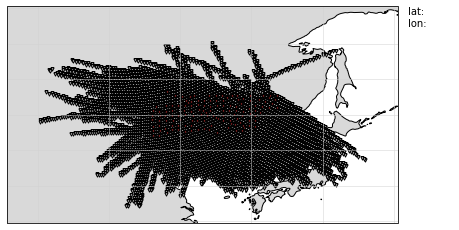

In [5]:
# Plot bins
# %matplotlib widget
import matplotlib.pyplot as plt
plt.ion()
ccpstack.plot_bins()

### Read stack from file and interpolate volume

In [6]:
import numpy as np
from pyglimer.ccp.ccp import read_ccp

# ccpstack = read_ccp(filename='ccp_IU_HRV.pkl', fmt=None)

lats = np.arange(41, 43.5, 0.05)
lons = np.arange(-72.7, -69.5, 0.05)
z = np.linspace(-10, 200, 211)


### Use the `CCPStack` object to image the subsurface

Given a `CCPStack` object there are multiple ways to get images of the subsurface.

#### Compute Volume and slice using 2D images

In [7]:
vplot = ccpstack.plot_volume_sections(lons, lats, zmax=211, lonsl=-71.45, latsl=42.5, zsl=23)

Creating Spherical Nearest Neighbour class ... done.
Creating interpolators ...

ValueError: zero-size array to reduction operation maximum which has no identity

#### Compute Slices through the Stack using cross sections

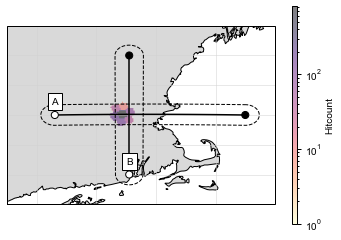

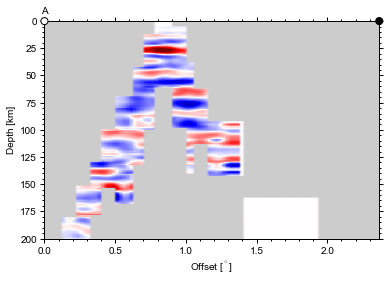

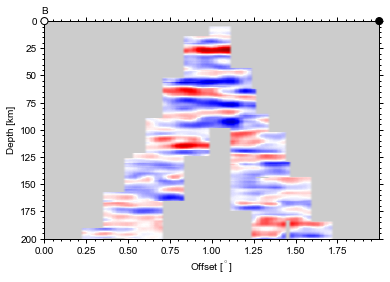

In [39]:
# Create points waypoints for the cross section
lat0 = np.array([42.5, 42.5])
lon0 = np.array([-72.7, -69.5])
lat1 = np.array([41.5, 43.5])
lon1 = np.array([-71.45, -71.45])

# Set RF boundaries
mapextent=[-73.5, -69, 41, 44]
depthextent=[0, 200]
vmin = -0.1
vmax =  0.1
 
# Plot cross sections
ax1, geoax = ccpstack.plot_cross_section(
    lat0, lon0, z0=23, vmin=vmin, vmax=vmax,
    mapplot=True, minillum=1, label="A", 
    depthextent=depthextent,
    mapextent=mapextent)
ax2, _ = ccpstack.plot_cross_section(
    lat1, lon1, vmin=vmin, vmax=vmax,
    geoax=geoax, mapplot=True,  
    minillum=1, label="B",
    depthextent=depthextent
)